In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [34]:
top5df = pd.read_csv('/content/top5.tsv', sep='\t')# read top5.sv to top5df

top5 = ['Diazepam', 'Valium', 'Xanax', 'Alprazolam', 'Lorazepam']# names are from a shell script
WR = [8.72, 8.68, 8.50, 8.20, 8.00]# weighted ratings are hard coded from a shell script output
reviews = [68, 28, 97, 153, 119]# hardcoded review count using grep in terminal:
# grep -c "Diazepam" /Users/martiin/Desktop/a5_ds/FinalDrugDS.tsv

# created a new data frame = newtop5df with 3 columns containing values from top5, WR, and reviews
newtop5df = pd.DataFrame({'drugName': top5,'weightedRating': WR, 'reviewCount': reviews})

newtop5df.head()

,drugName,weightedRating,reviewCount
0,Diazepam,8.72,68
1,Valium,8.68,28
2,Xanax,8.50,97
3,Alprazolam,8.20,153
4,Lorazepam,8.00,119


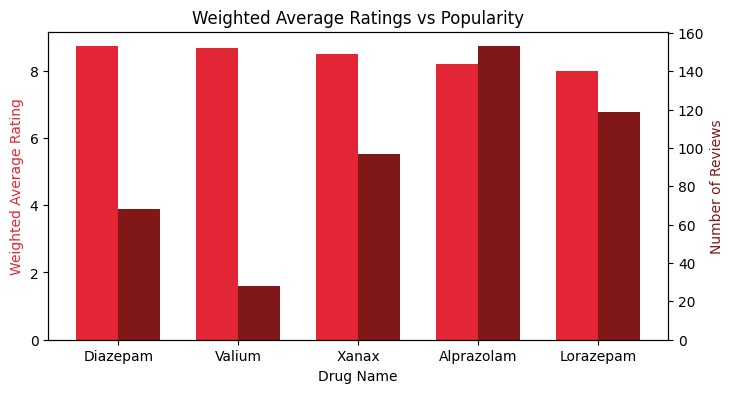

In [41]:
# bar positions
range1 = range(len(newtop5df)) # range1 = number of entries in newtop5df
range2 = [x + .35 for x in range1] # range2 = num of entries in newtop5df + .35 (width of bars)
# ensures that range2 is right next to range 1

fig, ax1 = plt.subplots(figsize=(8, 4)) # creates a figure and subplots

# create the Weighted Rating bars with customizations (5 bars for the 5 drugs)
wrBars = ax1.bar(range1, newtop5df['weightedRating'], color='#E32636', width = .35, label='Weighted Average Rating')


ax2 = ax1.twinx()# create twin axis to share the x axis, with a second y axis; make second bar
popularBars = ax2.bar(range2, newtop5df['reviewCount'], color='#801818', width = .35, label='Number of Reviews')

# meaningful labels
ax1.set_xlabel('Drug Name')
ax1.set_ylabel('Weighted Average Rating', color='#E32636')# color matched to wrBars
ax2.set_ylabel('Number of Reviews', color='#801818')# color matched to popularBars
ax1.set_title('Weighted Average Ratings vs Popularity')

# sets x-axis tickmarks to be centered in between bar pairs
ax1.set_xticks([r + .35 / 2 for r in range(len(newtop5df))])
ax1.set_xticklabels(newtop5df['drugName'])# sets labels for the ticks

plt.show()


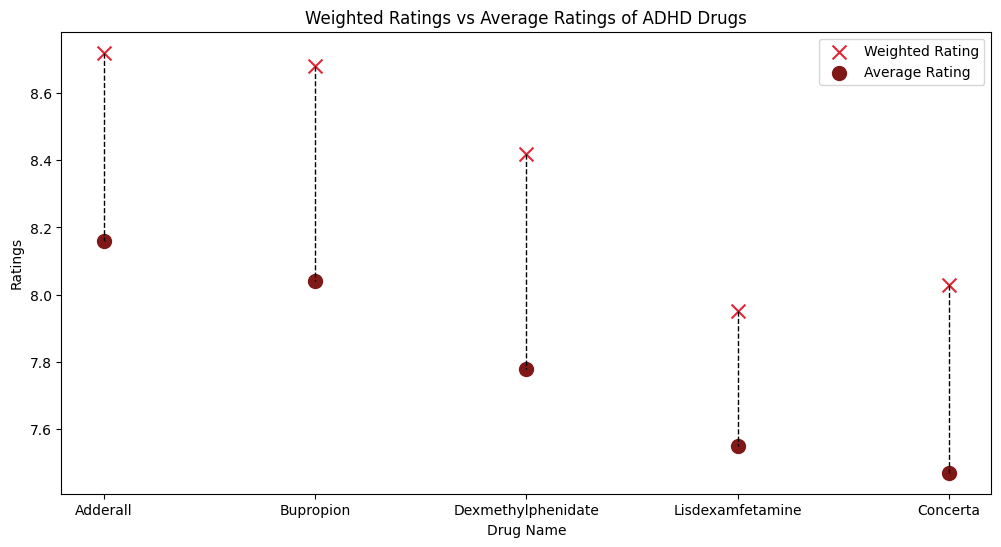

In [51]:
# hard coded the variable values from the output of two separate shell scripts
# drugname_wr = Weighted Rating
adderall_wr = 8.72
bupropion_wr = 8.68
dexmethylphenidate_wr = 8.42
lisdexamfetamine_wr = 7.95
concerta_wr = 8.03
# drugname_ ar = Average Rating
adderall_ar = 8.16
bupropion_ar = 8.04
dexmethylphenidate_ar = 7.78
lisdexamfetamine_ar = 7.55
concerta_ar = 7.47

# variables with hard coded names from the same shell script outputs
drugs = ['Adderall', 'Bupropion', 'Dexmethylphenidate', 'Lisdexamfetamine', 'Concerta']
# 2 arrays for WR's and AR's
WRatings = [adderall_wr, bupropion_wr, dexmethylphenidate_wr, lisdexamfetamine_wr, concerta_wr]
ARatings = [adderall_ar, bupropion_ar, dexmethylphenidate_ar, lisdexamfetamine_ar, concerta_ar]


fig, ax = plt.subplots(figsize=(12, 6))# make a scatter plot figure

# plot the weighted ratings , size increased to 100 for visibility, with marker 'x'
ax.scatter(drugs, WRatings, color='#E32636', label='Weighted Rating', s=100, marker='x')

# plot the average ratings
ax.scatter(drugs, ARatings, color='#801818', label='Average Rating', s=100)

for i in range(len(drugs)):# add nice dotted lines between each pair of WR and AR
    ax.plot([drugs[i], drugs[i]], [WRatings[i], ARatings[i]], color = 'black', linestyle='--', linewidth = 1)

# add meaningful labels
ax.set_xlabel('Drug Name')
ax.set_ylabel('Ratings')
ax.set_title('Weighted Ratings vs Average Ratings of ADHD Drugs')
ax.legend()

# Display the plot
plt.show()
